### First we will import all our data sctructure and visualization tools

In [3]:
import sys; sys.path.insert(0, "..") 
import os
import random
import src.visualization.utils as vis
from src.dataset.dataset import Data
from src.dataset.utils import train_test_val_split, get_balanced_initial_pool

### Lets load our data

In [4]:
import pandas as pd
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
pd.set_option("display.precision", 2)

df = pd.read_csv("../data/unzip_filenames.csv")
df["patient_id"] = df["patient_id"].astype(int)
df["scan_id"] = df["scan_id"].astype(int)
df["label"] = df["label"].astype(str)
df.head()

,zip_file,label,patient_id,scan_id,n_slice
0,CP-1.zip,CP,0,3131,285
1,CP-1.zip,CP,0,3132,42
2,CP-1.zip,CP,0,3133,290
3,CP-1.zip,CP,0,3134,37
4,CP-1.zip,CP,0,3135,269


In [6]:
from src.features.convert_images_to_npy import process_cncb_data


root_dir = "../data/"
files, classes = process_cncb_data(root_dir=root_dir)
files[:5]

['../data/CP/3783/5727/0008.png',
 '../data/CP/3783/5727/0009.png',
 '../data/CP/3783/5727/0010.png',
 '../data/CP/3783/5727/0011.png',
 '../data/CP/3783/5727/0012.png']

In [4]:
files_extended = [x.replace("\\", "/").split("/")[2:] for x in files]
files_extended[:5]

[['CP', '3783', '5727', '0008.png'],
 ['CP', '3783', '5727', '0009.png'],
 ['CP', '3783', '5727', '0010.png'],
 ['CP', '3783', '5727', '0011.png'],
 ['CP', '3783', '5727', '0012.png']]

In [5]:
used_df = pd.DataFrame(files_extended, columns=["label", "patient_id", "scan_id", "slice"])
used_df["patient_id"] = used_df["patient_id"].astype(int)
used_df["scan_id"] = used_df["scan_id"].astype(int)
used_df["label"] = used_df["label"].astype(str)
used_df.head()

,label,patient_id,scan_id,slice
0,CP,3783,5727,0008.png
1,CP,3783,5727,0009.png
2,CP,3783,5727,0010.png
3,CP,3783,5727,0011.png
4,CP,3783,5727,0012.png


In [ ]:
new_df = pd.merge(used_df, df,  how='left', left_on=["label", "patient_id", "scan_id"], right_on = ["label", "patient_id", "scan_id"])

In [ ]:
new_df[new_df["patient_id"] == 624]

In [ ]:
new_df.groupby("label")["patient_id"].unique()

In [ ]:
x = new_df.groupby("label")["slice"].count()
x

In [ ]:
x = new_df.groupby("label")["scan_id"].nunique().plot(kind='bar', grid=False, figsize=(12,8), color=["lightgreen", "limegreen", "seagreen"], zorder=2)
# Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Label", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Number of Patients", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
x = df[df["label", "patient_id"]]['patient_id'].value_counts().plot(kind='bar', grid=False, figsize=(12,8), color=["lightgreen", "limegreen", "seagreen"], zorder=2)
# Despine
x.spines['right'].set_visible(False)
x.spines['top'].set_visible(False)
x.spines['left'].set_visible(False)

# Switch off ticks
x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw horizontal axis lines
vals = x.get_yticks()
for tick in vals:
    x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Remove title
x.set_title("")

# Set x-axis label
x.set_xlabel("Label", labelpad=20, weight='bold', size=12)

# Set y-axis label
x.set_ylabel("Number of Scans", labelpad=20, weight='bold', size=12)

# Format y-axis label
x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [ ]:
ax = df["label"].apply(pd.value_counts).hist(bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = df["label"].apply(pd.value_counts).plot(kind='hist', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
# ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Session Duration (Seconds)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [147]:
from src.dataset.dataset import VolumeDataset


root_dir = "../data/"
files, classes = process_cncb_data(root_dir=root_dir)


train = VolumeDataset(files=files[::-1], lbls=classes[::-1])

In [148]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train, batch_size=64, shuffle=False)

data, target = next(iter(train_loader))

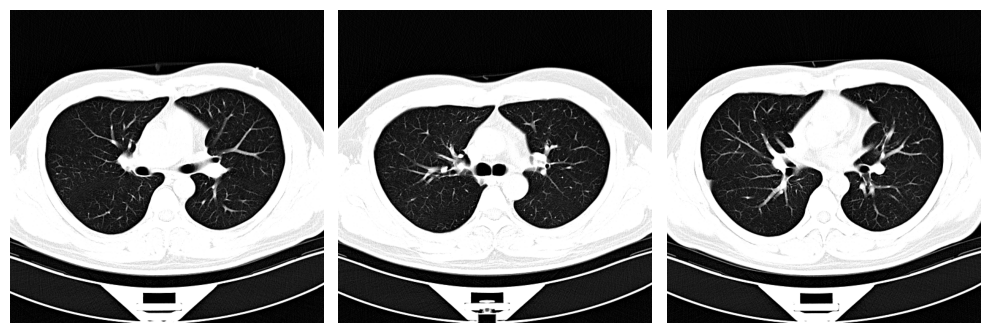

In [150]:
import matplotlib.pyplot as plt

# data, target = next(iter(train_loader))
_CLASS_MAP = ["CP", "NCP", "Normal"]
half_way = data.size(0)//2
fig = plt.figure(figsize=(10, 10))
for idx, i in enumerate([half_way, half_way + 4, half_way + 8]):
    fig.add_subplot(1, 3, idx+1)
    plt.imshow(data[i].permute(1, 2, 0))
    # plt.title(_CLASS_MAP[int(target[i].numpy())])
    plt.axis("off")
    # plt.show()
fig.tight_layout()
plt.show()

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(Data.files, Data.lbls, train_size=.7, test_size=.2)

### Visualize the initial pool

In [ ]:
random_idx = get_balanced_initial_pool(y_train, initial_pool=3)
n_slices = 3
classes = ["CP", "NCP", "Normal"]
for idx in random_idx:
    volume, label = Data[Data.files.index(X_train[idx])]
    print(classes[label])
    vis.plot_slices(2, 10, 20, volume)

### Now lets visualize a whole volume 

In [ ]:
sys.path.insert(0, "..") 
from src.dataset.dataset import default_image_load_fn 

In [ ]:
path = "../data/CP/0/3131"

In [ ]:
volume = []
for sclice in os.listdir(path):
    volume.append(np.array(cv2.imread(os.path.join(path, sclice), cv2.IMREAD_GRAYSCALE)))
    
scan = "../data/NPY/volumes/vol_CP_0_3131.npy"
print(scan)
# volume, label = Data[random_idx]
small_volume = default_image_load_fn(scan)
vis.plot_volume([np.array(volume), small_volume])

In [ ]:
from PIL import Image

img = Image.open(r"../images/test_accuracy VS dataset_len.jpeg")
img

In [ ]:
img = Image.open(r"../images/test_accuracy.jpeg")
img

### Convolutional plots

In [ ]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt

img = Image.open(r"C:\Users\Bastian\Documents\Master Mathematik\MasterArbeit\Deep Bayesian Active Learning for Covid-19 Diagnosis\TUM-THESIS\graphics\flower.jpg")
plt.imshow(img)

In [ ]:
import os
img = Image.open(os.path.join("../data/CP/0/3131", "0069.png"))
plt.imshow(img)
plt.axis('off')

In [ ]:
kernel_edge = ImageFilter.FIND_EDGES
plt.imshow(img.filter(kernel_edge))
plt.axis('off')

In [ ]:
kernel_blur = ImageFilter.BoxBlur(4)
plt.imshow(img.filter(kernel_blur))
plt.axis('off')

In [ ]:
import seaborn as sns

sns.set()

plt.plot(x, norm.pdf(x, 0, 1))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#make this example reproducible
np.random.seed(0)

from scipy.stats import norm

#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, norm.pdf(x, 0, 1), label='μ: 0, σ: 1', linewidth=3)
plt.plot(x, norm.pdf(x, 1, 1), label='μ: 1, σ: 1', linewidth=3)
ax = plt.gca()
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#make this example reproducible
np.random.seed(0)

from scipy.special import kl_div
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """

    return q * np.log(q/p)
#x-axis ranges from -5 and 5 with .001 steps
x = np.arange(-5, 5, 0.001)

#define multiple normal distributions
plt.plot(x, kl(norm.pdf(x, 1, 1), norm.pdf(x, 0, 1)), linewidth=3)
ax = plt.gca()
# Set bottom and left spines as x and y axes of coordinate system
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.legend()
plt.fill_between(x, kl(norm.pdf(x, 1, 1), norm.pdf(x, 0, 1)), step="pre", alpha=0.4)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title("One informative feature, one cluster per class", fontsize="small")
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, n_samples=500
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X1, Y1)

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
fig = plt.figure()
ax = fig.gca()

kernel='rbf'

disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X1,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="x1",
        ylabel="x2",
    )
ax.scatter(X1[:,0], X1[:,1], c=Y1, cmap=plt.cm.coolwarm, s=10, edgecolors="k")
ax.set_title(f"Multiclass SVM with {kernel} kernel")    
plt.show()

In [ ]:
import torch

class DropoutNet(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super(DropoutNet, self).__init__(*args, **kwargs)

        self.model = torch.nn.Sequential(
            torch.nn.Linear(2, 5),
            torch.nn.ReLU(),
            # torch.nn.Dropout(.05),
            torch.nn.Linear(5, 5),
            torch.nn.ReLU(),
            # torch.nn.Dropout(.05),
            torch.nn.Linear(5, 1)
        )
        
    def forward(self, x):
        return self.model(x)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.from_numpy(X1).to(torch.float32) # transform to torch tensor
tensor_y = torch.from_numpy(Y1).to(torch.float32)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset, batch_size=12) # create your dataloader

In [ ]:
model = DropoutNet().to("cuda")
from torch import optim

optimizer = optim.Adam(model.parameters(), lr=1)
criterion = torch.nn.BCEWithLogitsLoss()
losses = []
for epoch in range(10):
    model.train()
    running_loss = 0
    correct = 0
    for x, y in my_dataloader:
        optimizer.zero_grad()
        x = x.cuda()
        y = y.cuda()
        output = model(x)
        loss = criterion(output.flatten(), y)
        correct += (torch.argmax(output)==y).sum()
        # print(torch.argmax(output, dim=1))
        # print(y)
        # print((torch.argmax(output, dim=1)==y).sum())
        # clear gradients for this training step
        running_loss += loss.item() 
        # backpropagation, compute gradients
        loss.backward()  # apply gradients
        optimizer.step()
        losses.append(running_loss)
    print("Epoch [{}/{}], Loss: {}, Accuracy: {}".format(epoch+1, 10, running_loss/500, correct/500))


In [1]:
import torch.nn as nn

import matplotlib.pyplot as plt

from PIL import Image

In [2]:
import cv2

img = cv2.imread("C:/Users/Bastian/Documents/Master Mathematik/MasterArbeit/Deep Bayesian Active Learning for Covid-19 Diagnosis/TUM-THESIS/graphics/lung_scan.png", cv2.IMREAD_GRAYSCALE)

In [3]:
img = Image.open("C:/Users/Bastian/Documents/Master Mathematik/MasterArbeit/Deep Bayesian Active Learning for Covid-19 Diagnosis/TUM-THESIS/graphics/lung_scan.png")

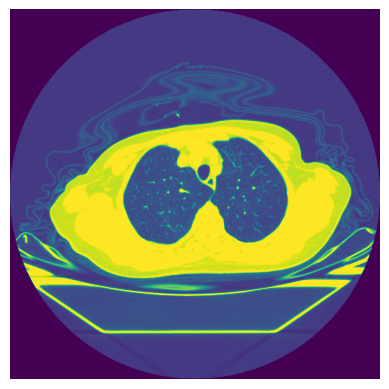

In [4]:
img


In [37]:
import os 

l = len(os.listdir("../data/Normal/742/177"))

In [85]:
i = np.arange(0, 47, 3)
i

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45])

In [86]:
l = np.concatenate((i, [43, 45, 47, 50]))

In [84]:
len(np.arange(0, 47, 3))

16

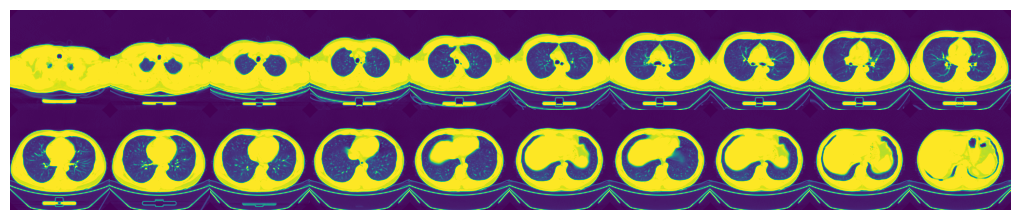

In [87]:
import numpy as np
from matplotlib import gridspec

w = 10
h = 10
columns = 10
rows = 2
fig = plt.figure(figsize=(columns+1, rows+1))
# ax enables access to manipulate each of subplots
ax = []
gs = gridspec.GridSpec(rows, columns, wspace=0.0, hspace=0.0, 
         top=1.-0.5/(rows+1), bottom=0.5/(rows+1), 
         left=0.5/(columns+1), right=1-0.5/(columns+1)) 

for i in range(rows):
    for j in range(columns):
    # img = np.random.randint(10, size=(h,w))
        ax = plt.subplot(gs[i,j])
        # ax.append( fig.add_subplot(rows, columns, i) )
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(False)
        ax.set_axis_off()
        idx = l[i*columns+j]
        img = Image.open("../data/Normal/742/177/{}.png".format(str(idx).zfill(4))).convert('L')
        ax.imshow(img)
# plt.tight_layout() # optional
plt.show()

In [52]:
import torch
import numpy as np

img_tensor = torch.tensor(np.array(img)).type(torch.float64)
img_tensor.shape

torch.Size([389, 389, 4])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


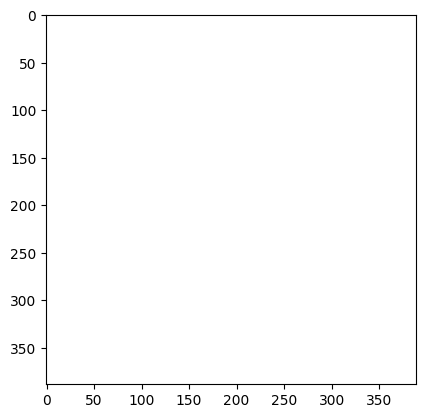

In [51]:
plt.imshow(img_tensor[..., :3])

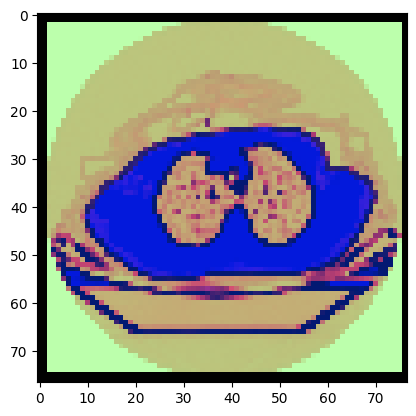

In [58]:
from torchvision.transforms import transforms

pooling = nn.MaxPool2d((5, 5))
plt.imshow(transforms.ToPILImage()(pooling(img_tensor[..., :3].permute(2, 0, 1).unsqueeze(0)).squeeze(0).squeeze(0)))

In [ ]:
def show_loss(losses):
    plt.figure(figsize=(12, 8))
    plt.plot(range(len(losses)), losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.show()

show_loss(losses)

In [ ]:
import numpy as np

def leakyrelu(x):
    ''' It returns '0' is the input is less then zero otherwise it returns one '''
    return np.maximum(x, 0.1*x)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}

mpl.rc('text', usetex = True)
mpl.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : r'\usepackage{amsmath}'}
plt.rcParams.update(params)

plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [ ]:
# Draw Plot
fig, ax = plt.subplots(1, figsize=(14, 10))
x = np.linspace(-1, 1, 100000)
plt.plot(x, leakyrelu(x), color="navy",  lw=3)


plt.xlim(-1, 1)
plt.ylim(-1, 1.5)
# plt.setp(ax, xticks=[], yticks=[])
# plt.xticks(fontsize=12, alpha=.7)
# plt.yticks(fontsize=12, alpha=.7)
# plt.title("Binary Step", fontsize=22)
plt.grid(axis='both', alpha=.3)
ax.grid(True)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.axhline(y=0, color='k', alpha=.5)
plt.axvline(x=0, color='k', alpha=.5)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 

#text box
plt.text(-.6, 1, r"Leaky ReLU \\ \newline $ y = \begin{cases} \alpha x &\text{ if } x < 0, \\ x &\text{ if } x \geq 0 \end{cases}$", size=25,
         ha="center", va="center",
         bbox=dict(boxstyle="square",facecolor='none', edgecolor='black')
         )

plt.show()